In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.ticker as mticker

## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/123598807.gadi-pbs'

In [3]:
# set lat/lon lims
lat_min=-75
lat_max=-50
lon_min=40
lon_max=105

In [7]:
# load multiple netcdf files
import glob
FilePath='/g/data/gi0/iomp/ECCO2_cube92_monthly/'
prefix='SALT/SALT.1440x720x50.'
filestring='*.nc'

filelist = glob.glob(FilePath+prefix+filestring)

ds = xr.open_mfdataset(filelist,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

ds

79.626251912 G


<xarray.Dataset>
Dimensions:      (DEPTH_T: 50, LATITUDE_T: 720, LONGITUDE_T: 1440, TIME: 384)
Coordinates:
  * DEPTH_T      (DEPTH_T) float32 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * LATITUDE_T   (LATITUDE_T) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * LONGITUDE_T  (LONGITUDE_T) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * TIME         (TIME) datetime64[ns] 1992-01-16 1992-02-16 ... 2023-12-16
Data variables:
    SALT         (TIME, DEPTH_T, LATITUDE_T, LONGITUDE_T) float32 dask.array<chunksize=(1, 50, 720, 1440), meta=np.ndarray>
Attributes:
    description:  ECCO2 cube92 monthly average

In [41]:
filelist

['/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.201704.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.200209.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.201012.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.202305.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.202301.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.199412.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.200805.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.199208.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.201211.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.201409.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.199611.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.202209.nc',
 '/g/data/gi0/iomp/ECCO2_cube92_monthly/THETA/THETA.1440x720x50.202211.nc',
 '/g/data/gi

In [8]:
# subset

SALT_sub = ds.SALT.sel(LATITUDE_T=slice(lat_min,lat_max),LONGITUDE_T=slice(lon_min,lon_max)) #.sel(DEPTH_T=250,method='nearest')

In [9]:
prefix='THETA/THETA.1440x720x50.'
filestring='*.nc'

filelist = glob.glob(FilePath+prefix+filestring)

ds = xr.open_mfdataset(filelist,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

ds

79.626251912 G


<xarray.Dataset>
Dimensions:      (DEPTH_T: 50, LATITUDE_T: 720, LONGITUDE_T: 1440, TIME: 384)
Coordinates:
  * DEPTH_T      (DEPTH_T) float32 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * LATITUDE_T   (LATITUDE_T) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * LONGITUDE_T  (LONGITUDE_T) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * TIME         (TIME) datetime64[ns] 1992-01-16 1992-02-16 ... 2023-12-16
Data variables:
    THETA        (TIME, DEPTH_T, LATITUDE_T, LONGITUDE_T) float32 dask.array<chunksize=(1, 50, 720, 1440), meta=np.ndarray>
Attributes:
    description:  ECCO2 cube92 monthly average

In [10]:
# subset

THETA_sub = ds.THETA.sel(LATITUDE_T=slice(lat_min,lat_max),LONGITUDE_T=slice(lon_min,lon_max)) #.sel(DEPTH_T=250,method='nearest')

In [51]:
# SALT_sub.groupby('TIME.month').mean(dim='TIME').isel(month=8).isel(DEPTH_T=0).plot()
# plt.show()
# SALT_sub.isel(TIME=8).isel(DEPTH_T=0).plot()


In [52]:
# SALT_sub.isel(TIME=0).isel(DEPTH_T=10).plot()
# plt.show()
# SALT_sub.isel(TIME=12).isel(DEPTH_T=10).plot()
# plt.show()
# SALT_sub.isel(TIME=24).isel(DEPTH_T=10).plot()
# plt.show()
# SALT_sub.isel(TIME=36).isel(DEPTH_T=10).plot()
# plt.show()

In [11]:
# make climatologies

SALT_clima = SALT_sub.groupby('TIME.month').mean('TIME')
THETA_clima = THETA_sub.groupby('TIME.month').mean('TIME')

In [12]:
# load climatologies, as they'll be used repeatedly
SALT_clima.load()
THETA_clima.load()

<xarray.DataArray 'THETA' (month: 12, DEPTH_T: 50, LATITUDE_T: 100,
                           LONGITUDE_T: 260)>
array([[[[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [4.106173 , 4.052551 , 4.01414  , ..., 5.3300185, 5.282939 ,
          5.243391 ],
         [4.2964706, 4.277397 , 4.2637663, ..., 5.4008455, 5.3763275,
          5.3545513],
         [4.465002 , 4.4543104, 4.445881 , ..., 5.486803 , 5.4602966,
          5.438247 ]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
...
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]]]], dtype=float32)
Coordinates:
  * DEPTH_T      (DEPTH_T) float32 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * LATITUDE_T   (LATITUDE_T) float32 -74.88 -74.62 -74.38 ... -50.38 -50.12
  * LONGITUDE_T  (LONGITUDE_T) float32 40.12 40.38 40.62 ... 104.4 104.6 104.9
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:                         deg C
    long_name:                     Potential Temperature
    FillValue:                     -9.9999998e+22
    number_of_significant_digits:  7

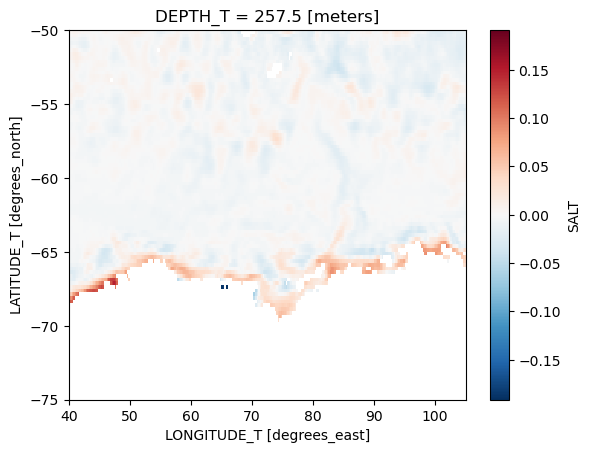

In [53]:
(SALT_clima.sel(DEPTH_T=250,method='nearest').isel(month=1)-SALT_clima.sel(DEPTH_T=250,method='nearest').isel(month=8)).plot()

<Figure size 640x480 with 0 Axes>

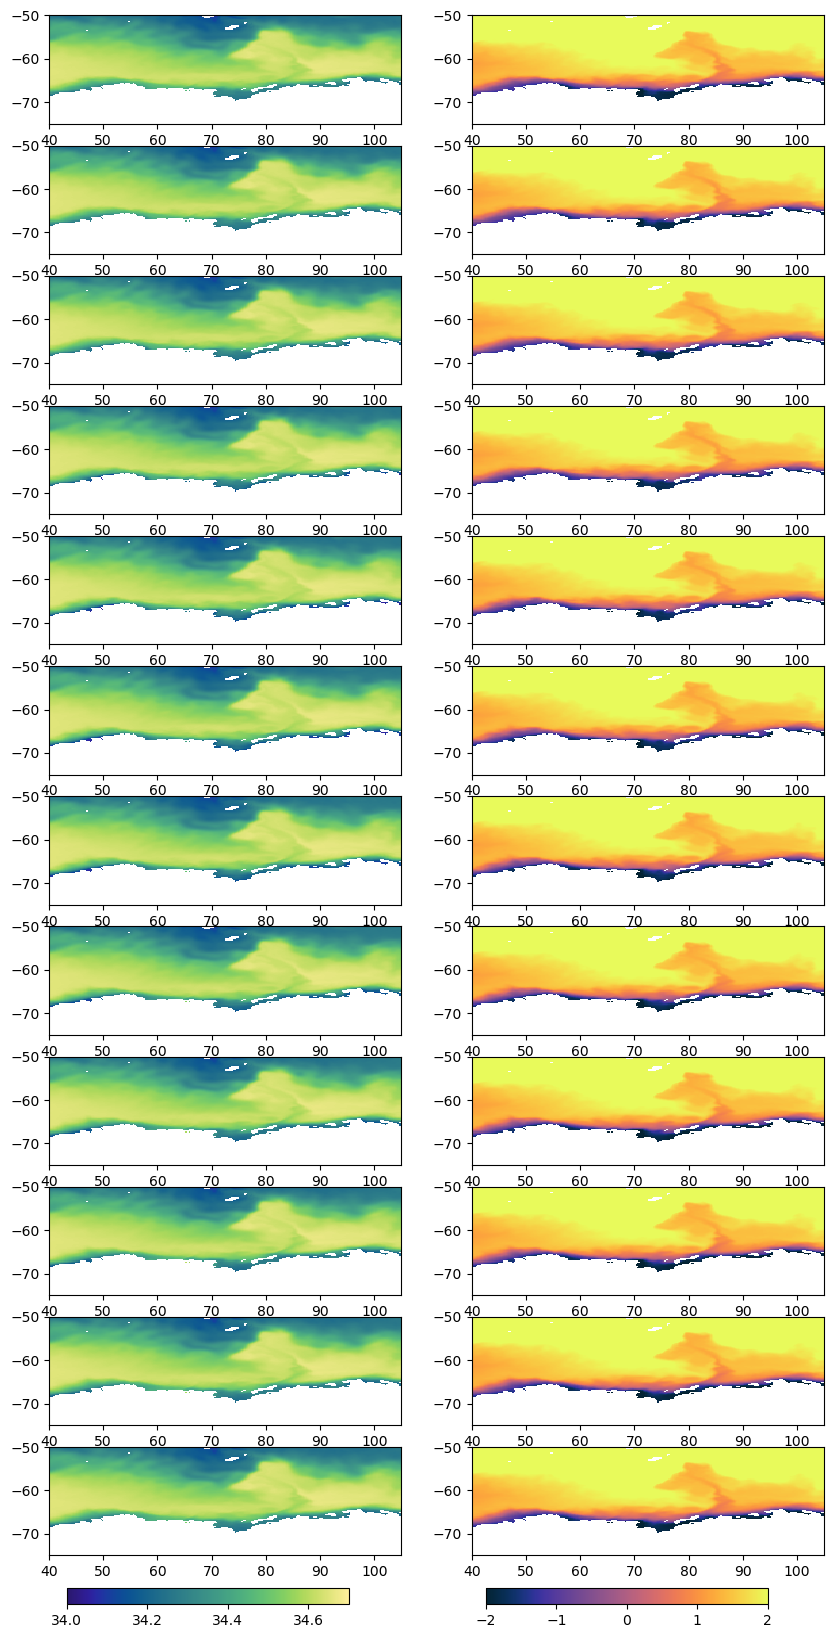

In [27]:
# make climatology plot


gs = gridspec.GridSpec(nrows=12,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,20])
ax = None

for mm in np.arange(1,13):
    ax=fig.add_subplot(gs[mm-1,0])
    im = SALT_clima.sel(DEPTH_T=250,method='nearest').sel(month=mm).plot(ax=ax,vmin=34,vmax=34.7,cmap='cmo.haline',add_colorbar=False)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax=fig.add_subplot(gs[mm-1,1])
    im2 = THETA_clima.sel(DEPTH_T=250,method='nearest').sel(month=mm).plot(ax=ax,vmin=-2,vmax=2,cmap='cmo.thermal',add_colorbar=False)   
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(-1.15,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
# # cax.set_title(r'salt')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'pot temp')

<Figure size 640x480 with 0 Axes>

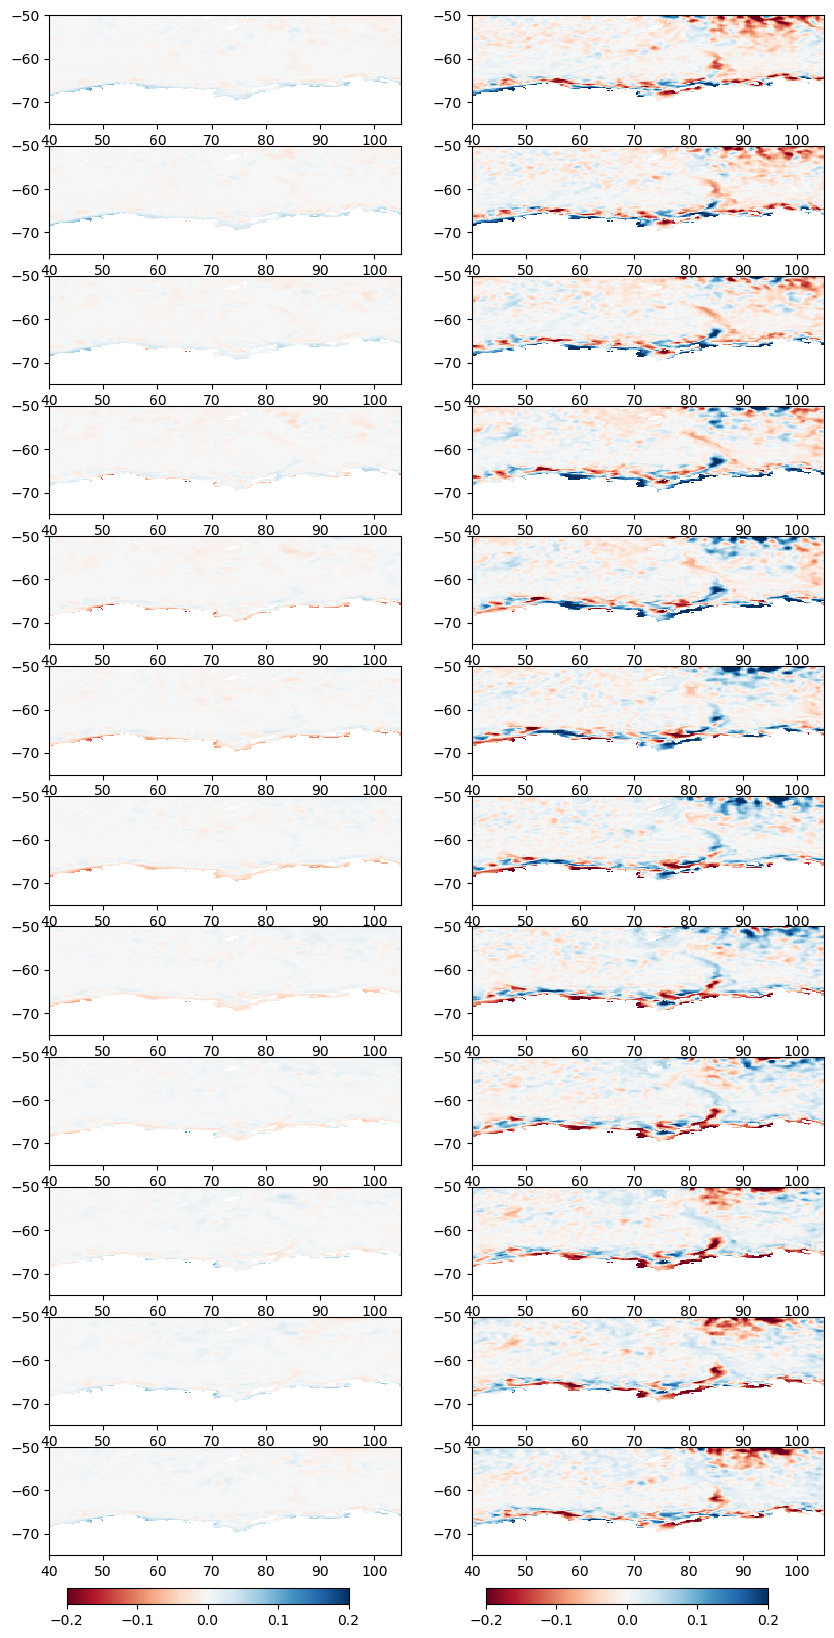

In [57]:
# anomalies from yearly mean plot


gs = gridspec.GridSpec(nrows=12,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,20])
ax = None

for mm in np.arange(1,13):
    ax=fig.add_subplot(gs[mm-1,0])
    im = (SALT_clima.sel(DEPTH_T=250,method='nearest').sel(month=mm)-SALT_clima.sel(DEPTH_T=250,method='nearest').mean(dim='month')).plot(ax=ax,vmin=-.2,vmax=.2,cmap='RdBu',add_colorbar=False)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax=fig.add_subplot(gs[mm-1,1])
    im2 = (THETA_clima.sel(DEPTH_T=250,method='nearest').sel(month=mm)-THETA_clima.sel(DEPTH_T=250,method='nearest').mean(dim='month')).plot(ax=ax,vmin=-.2,vmax=.2,cmap='RdBu',add_colorbar=False)   
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(-1.15,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
# # cax.set_title(r'salt')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'pot temp')

In [59]:
SALT_sub

<xarray.DataArray 'SALT' (TIME: 384, DEPTH_T: 50, LATITUDE_T: 100,
                          LONGITUDE_T: 260)>
dask.array<getitem, shape=(384, 50, 100, 260), dtype=float32, chunksize=(1, 50, 100, 260), chunktype=numpy.ndarray>
Coordinates:
  * DEPTH_T      (DEPTH_T) float32 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * LATITUDE_T   (LATITUDE_T) float32 -74.88 -74.62 -74.38 ... -50.38 -50.12
  * LONGITUDE_T  (LONGITUDE_T) float32 40.12 40.38 40.62 ... 104.4 104.6 104.9
  * TIME         (TIME) datetime64[ns] 1992-01-16 1992-02-16 ... 2023-12-16
Attributes:
    units:                         g/kg
    long_name:                     Salinity
    FillValue:                     -9.9999998e+22
    number_of_significant_digits:  7

In [67]:
for yy,ii in enumerate(range(1992,2023,1)):
    print(yy,ii)

0 1992
1 1993
2 1994
3 1995
4 1996
5 1997
6 1998
7 1999
8 2000
9 2001
10 2002
11 2003
12 2004
13 2005
14 2006
15 2007
16 2008
17 2009
18 2010
19 2011
20 2012
21 2013
22 2014
23 2015
24 2016
25 2017
26 2018
27 2019
28 2020
29 2021
30 2022


<Figure size 640x480 with 0 Axes>

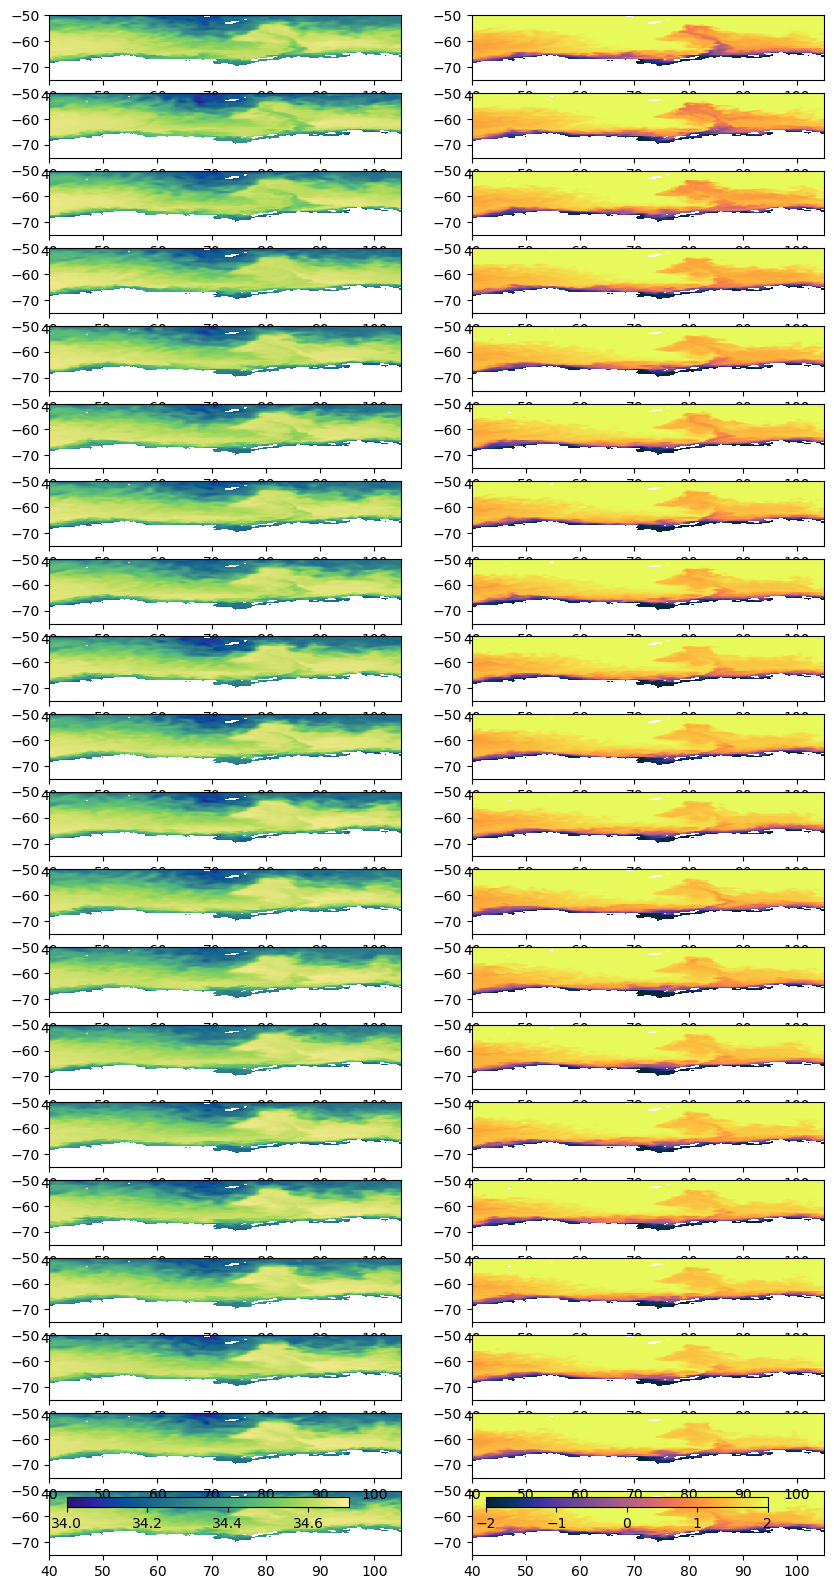

In [76]:
#now make some quick plots of yearly differences. Seeing as we don't see large differences within the year, lets just choose 2 different months:
# feb (lower salt on shelf) and august (higher salt on shelf).

# first plot the fields at these times. 

# make climatology plot


gs = gridspec.GridSpec(nrows=20,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,20])
ax = None

for ii,yy in enumerate(range(2000,2020,1)):
    year = str(yy)
    ax=fig.add_subplot(gs[ii-1,0])
    im = SALT_sub.sel(DEPTH_T=250,method='nearest').sel(TIME=year+'-02-15',method='nearest').plot(ax=ax,vmin=34,vmax=34.7,cmap='cmo.haline',add_colorbar=False)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax=fig.add_subplot(gs[ii-1,1])
    im2 = THETA_sub.sel(DEPTH_T=250,method='nearest').sel(TIME=year+'-08-15',method='nearest').plot(ax=ax,vmin=-2,vmax=2,cmap='cmo.thermal',add_colorbar=False)   
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(-1.15,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
# # cax.set_title(r'salt')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'pot temp')

In [81]:
for ii,yy in enumerate(range(2000,2020,1)):
    print(ii,yy)

0 2000
1 2001
2 2002
3 2003
4 2004
5 2005
6 2006
7 2007
8 2008
9 2009
10 2010
11 2011
12 2012
13 2013
14 2014
15 2015
16 2016
17 2017
18 2018
19 2019


<Figure size 640x480 with 0 Axes>

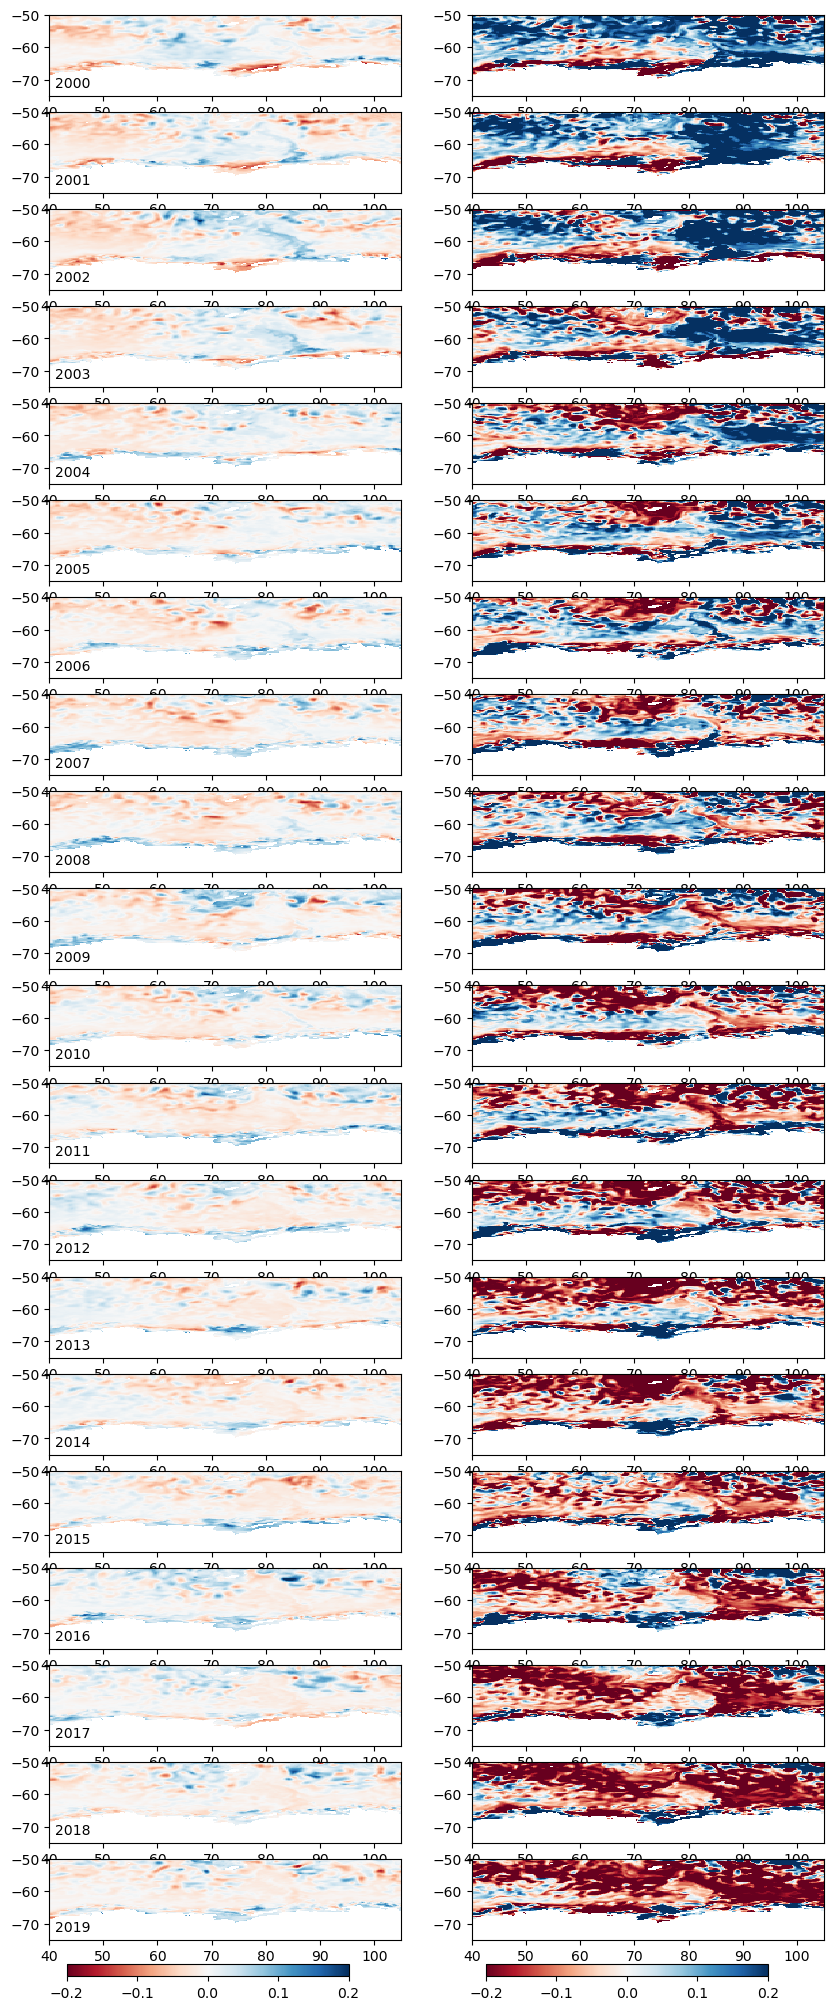

In [83]:
# now do same, but as an anomaly from the climatological month

#now make some quick plots of yearly differences. Seeing as we don't see large differences within the year, lets just choose 2 different months:
# feb (lower salt on shelf) and august (higher salt on shelf).

# first plot the fields at these times. 

# make climatology plot


gs = gridspec.GridSpec(nrows=20,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,25])
ax = None

for ii,yy in enumerate(range(2000,2020,1)):
    year = str(yy)
    ax=fig.add_subplot(gs[ii,0])
    im = (SALT_clima.sel(DEPTH_T=250,method='nearest').sel(month=1)-SALT_sub.sel(DEPTH_T=250,method='nearest').sel(TIME=year+'-02-15',method='nearest')).plot(ax=ax,vmin=-.2,vmax=.2,cmap='RdBu',add_colorbar=False)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(41,-72.5,year)
    
    ax=fig.add_subplot(gs[ii,1])
    im2 = (THETA_clima.sel(DEPTH_T=250,method='nearest').sel(month=7)-THETA_sub.sel(DEPTH_T=250,method='nearest').sel(TIME=year+'-08-15',method='nearest')).plot(ax=ax,vmin=-.2,vmax=.2,cmap='RdBu',add_colorbar=False)   
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(-1.15,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
# # cax.set_title(r'salt')

cax = inset_axes(ax,
                width="80%",  # width = 10% of parent_bbox width
                height="15%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,-.45, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'pot temp')